# Flatmap: SUITPy
	
As part of the SUIT toolbox, we have developed a flat representation of the human cerebellum that can be used to visualise imaging data after volume-based normalisation and averaging across subjects. The method uses an approximate outer (grey-matter) and inner (white-matter) surface defined on the SUIT template (see figure below). Functional data between these two surfaces is projected to the surface along the lines connecting corresponding vertices. By applying cuts (thick black lines) the surface could be flattened out. We aimed to retain a roughly proportional relationship between the surface area of the 2D-representation and the volume of the underlying cerebellar grey matter. The map allows users to visualise the activation state of the complete cerebellar grey matter in one concise view, equally revealing both the anterior-posterior (lobular) and medial-lateral organisation. To explore the flatmap in more detail, check out our online cerebellar atlas viewer.

![title](jupyter-img/suit_flat_1.jpg)

The surface representation of the cerebellum is a group surface, designed to display functional data that has been averaged across participants in volumetric group space. It does not rely on reconstructions of individual surfaces. While latter is the best practice for the neocortex, unfolding the cerebellar surface of individual subjects is very hard and requires anatomical scans of very high resolution and quality.

![title](jupyter-img/suit_flat_2.jpg)

Thus there are three steps involved:
- Normalise data to a group space
- Map the data to the surface
- Display the data

For more details, see:
- Diedrichsen, J. & Zotow, E. (2015). Surface-based display of volume-averaged cerebellar data. PLoS One, 7, e0133402 (http://www.diedrichsenlab.org/pubs/PlosOne_flatmap_2015.pdf). 
- Video: https://www.youtube.com/watch?v=LipA4B73z-w&feature=youtu.be

## Installation and Requirements
Ensure you have Python and pip installed on your system. 

- Python: https://www.python.org/downloads/
- Pip: https://pip.pypa.io/en/stable/installing/

You will need to download the following dependencies:
- nibabel
- numpy
- matplotlib

For using openGL version: 
- glfw
- PyOpenGL

Open your command prompt and paste the following command:
pip install nibabel numpy matplotlib glfw PyOpenGL PyOpengGL_accelerate

## Mapping
You can map a list of volumes to the flat map with the following commands

In [1]:
# Import the Suit package
import SUITPy as suit
import matplotlib.pyplot as plt

In [2]:
# This command maps a functional volume to the surface. 
# The mapped data is returned as a numpy array
funcdata = suit.flatmap.vol_to_surf(['functionalMapsSUIT/MDTB08_Math.nii'])

# For label data, you want to take the most frequent label to assign to a node
# Not the mean 
labeldata = suit.flatmap.vol_to_surf(['atlasesSUIT/MDTB_10Regions.nii'],stats = 'mode')

## Plotting
The current version of the plotting routine utilizes matplotlib.

`suit.flatmap.plot(data)`

The main input argument is a vector of data to plot, a gifti image object, or the name of a gifti file to load. 

Optional arguments are:
- surf (str or giftiImage): surface file for flatmap (default: FLAT.surf.gii in SUIT pkg)
- underlay (str, giftiImage, or np-array): Full filepath of the file determining underlay coloring (default: SUIT.shape.gii in SUIT pkg)
- undermap (str): Matplotlib colormap used for underlay (default: Grays)
- underscale (array-like): Colorscale [min, max] for the underlay (default: [-1, 0.5])
- overlay_type (str)
    - 'func': functional activation
    - 'label': categories 
    - 'rgb': RGB values (default: func)
- threshold (scalar or array-like): Threshold for functional overlay. If one value is given, it is used as a positive threshold. If two values are given, an positive and negative threshold is used.
- cmap (str): Matplotlib colormap used for overlay (default: jet)
- borders (str): Full filepath of the borders txt file (default: borders.txt in SUIT pkg)
- cscale (int array): Colorscale [min, max] for the overlay
- alpha (float): Opacity of the overlay (default: 1)
- outputfile (str): Name / path to file to save figure (default None)
- render (str): Renderer for graphic display 'matplot' / 'opengl'. Dafault is matplotlib

 See full documentation in the Sphinx docs.

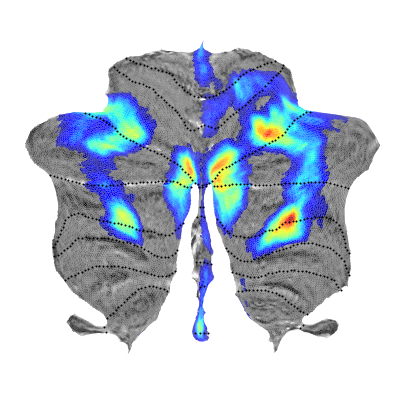

In [10]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot()
ax=suit.flatmap.plot(funcdata,cmap='jet', threshold=0.01)

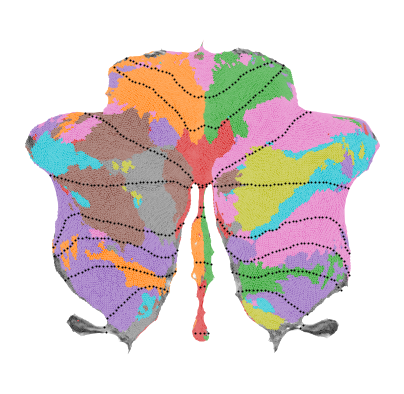

<AxesSubplot:>

In [4]:
# For label data choose overlay_type = 'label' and set the colormap 
# to a qualitative (categorical) color map 
fig = plt.figure(figsize=(7,7))
ax = plt.subplot()
suit.flatmap.plot(labeldata, overlay_type='label',cmap='tab10')

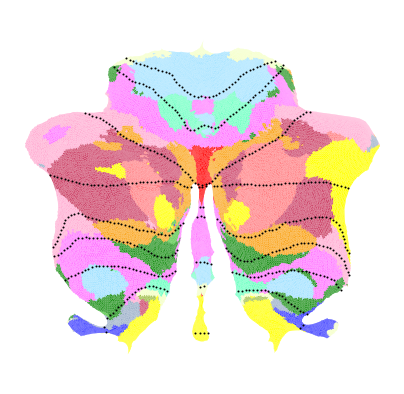

<AxesSubplot:>

In [7]:
# You can also plot directly from a gifti file 
# When you choose 'label', suit.flatmap.plot will also extract the color map from 
# the label.gii file and use it
fig = plt.figure(figsize=(7,7))
ax = plt.subplot()
suit.flatmap.plot('surfaces/Buckner_17Networks.label.gii',overlay_type='label')

## Plotting using OpenGL
Using the OpenGL render...
Currently not functional 

In [5]:
import SUITPy.flatmapOLG as flatmap 

# Figure 1
flatmap.plot("data/Wiestler_2011_motor_z.gii", cscale=[0,2], output_file="output/figure_1.jpg")

# Figure 2
flatmap.plot("data/HCP_WM_BODY_vs_REST.gii", cscale=[0,2], cmap="hot", threshold=[0.25], output_file="output/figure_2.jpg")

# Figure 3
flatmap.plot("data/Buckner_7Networks.gii", overlay_type="label", cmap="data/labels_cmap.txt", output_file="output/figure_3.jpg")

ModuleNotFoundError: No module named 'SUITPy.flatmapOLG'

![title](jupyter-img/examples.png)